In [1]:
import urllib.parse
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pymongo import MongoClient
from matplotlib.dates import DateFormatter

%matplotlib inline
sns.set(style="whitegrid")

In [2]:
class MongoHandler:
    def __init__(self):
        MONGO_USERNAME = 'foo'
        MONGO_PASSWORD = 'bar'
        self._client = self._get_mongo_client(user=MONGO_USERNAME, password=MONGO_PASSWORD)
        
    def _get_mongo_client(self, user: str, password: str) -> MongoClient:
        str_connection = self._get_mongo_str_connection(user, password)
        
        return MongoClient(str_connection)
        
    def _get_mongo_str_connection(self, user: str, password: str) -> str:
        MONGO_BASE_STRING_CONN = 'mongodb://{}:{}@localhost:27017/'
        parserd_username = urllib.parse.quote_plus(user)
        parserd_password = urllib.parse.quote_plus(password)

        return MONGO_BASE_STRING_CONN.format(parserd_username, parserd_password)

    def get_collection(self, database: str, collection: str):
        try:
            return self._client[database][collection]
        except e:
            print(e)

Setting connection with Mongo Database

In [17]:
MONGO_DB = 'tweetsdb'
MONGO_COLLECTION = 'covid'

mongoHandler = MongoHandler()
tweets_collection = mongoHandler.get_collection(database=MONGO_DB, collection=MONGO_COLLECTION)

In [25]:
df = pd.DataFrame(list(tweets_collection.find()))
df['created_at'] = pd.to_datetime(df['created_at'])

Text(0.5, 1.0, 'Covid dataset - Tweets by hour')

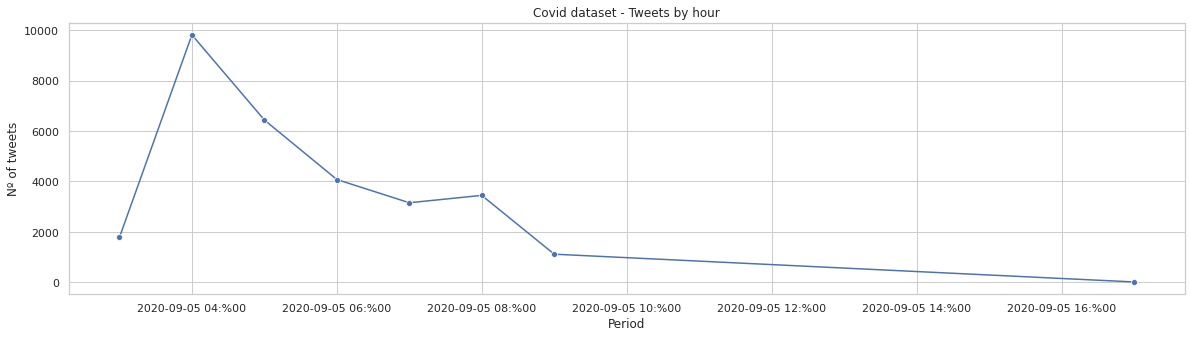

In [26]:
df['date'] = pd.to_datetime(df['created_at'].dt.strftime('%Y-%m-%d %H:00'), format='%Y-%m-%d %H:00')
df = df.groupby('date')
tweets_count = df['id'].count()

plt.figure(figsize=(20,5))

ax = sns.lineplot(
    data=tweets_count,
    palette="tab10",
    linewidth=1.5,
    marker='o'
)

date_form = DateFormatter('%Y-%m-%d %H:00')

ax.xaxis.set_major_formatter(date_form)
ax.set(xlabel='Period', ylabel='Nº of tweets')
ax.set_title('Covid dataset - Tweets by hour')
